In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from scipy.stats import uniform, randint

# Data Preprocessing (same as before)
data_dir = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Full segment\\Entropy code\\3000\\Entropy\\"
classes = ['Normal cases', 'Bengin cases', 'Malignant cases']
X = []
y = []

max_length = 0

# First pass to find max_length
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_dir):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(class_dir, file_name)
            df = pd.read_excel(file_path)
            flattened = df.to_numpy().flatten()
            max_length = max(max_length, len(flattened))

# Second pass: flatten arrays and pad them to max_length
for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_dir):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(class_dir, file_name)
            df = pd.read_excel(file_path)
            flattened = df.to_numpy().flatten()
            padded_features = np.pad(flattened, (0, max_length - len(flattened)), mode='constant')
            X.append(padded_features)
            y.append(class_idx)

X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import optuna
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the Optuna objective function
def objective(trial):
    # Hyperparameters to tune
    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)  # Number of neighbors
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])  # Distance metric
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  # Weight function
    p = trial.suggest_int('p', 1, 2)  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)

    # Create the KNN model with the hyperparameters
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights, p=p)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val_scaled)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy  # Return the accuracy as the objective to maximize

# Create an Optuna study and optimize the hyperparameters
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=5000)  # Number of trials can be adjusted based on time and computation

# Print the best hyperparameters and corresponding accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy on Validation Set: {study.best_value:.4f}")

# Optionally, you can train the model with the best parameters
best_params = study.best_params
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                metric=best_params['metric'],
                                weights=best_params['weights'],
                                p=best_params['p'])

best_knn.fit(X_train_scaled, y_train)
y_pred_best_knn = best_knn.predict(X_test_scaled)

# Final Evaluation on the test set
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Accuracy with Optimized KNN on Test Set: {accuracy_best_knn * 100:.2f}%")


[I 2024-12-06 21:03:59,886] A new study created in memory with name: no-name-19a2e38e-f650-471f-b85c-cbdd690063af
[I 2024-12-06 21:04:00,052] Trial 0 finished with value: 0.9158878504672897 and parameters: {'n_neighbors': 3, 'metric': 'minkowski', 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.9158878504672897.
[I 2024-12-06 21:04:00,073] Trial 1 finished with value: 0.9626168224299065 and parameters: {'n_neighbors': 14, 'metric': 'minkowski', 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.9626168224299065.
[I 2024-12-06 21:04:00,086] Trial 2 finished with value: 0.9252336448598131 and parameters: {'n_neighbors': 12, 'metric': 'euclidean', 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.9626168224299065.
[I 2024-12-06 21:04:00,104] Trial 3 finished with value: 0.9626168224299065 and parameters: {'n_neighbors': 7, 'metric': 'manhattan', 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.9626168224299065.
[I 2024-12-06 21:04:00,124] T

Best Hyperparameters: {'n_neighbors': 8, 'metric': 'manhattan', 'weights': 'distance', 'p': 2}
Best Accuracy on Validation Set: 0.9720
Accuracy with Optimized KNN on Test Set: 95.37%


In [33]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Standardize the features (important for KNN)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the Optuna objective function
def objective(trial):
    # Hyperparameters to tune
    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)  # Number of neighbors
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])  # Distance metric
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  # Weight function
    p = trial.suggest_int('p', 1, 2)  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)

    # Create the KNN model with the hyperparameters
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights, p=p)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy  # Return the accuracy as the objective to maximize

# Create an Optuna study and optimize the hyperparameters
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=5000)  # Number of trials can be adjusted based on time and computation

# Print the best hyperparameters and corresponding accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")

# Optionally, you can train the model with the best parameters
best_params = study.best_params
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                metric=best_params['metric'],
                                weights=best_params['weights'],
                                p=best_params['p'])

best_knn.fit(X_train, y_train)
y_pred_best_knn = best_knn.predict(X_test)

# Final Evaluation
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Accuracy with Optimized KNN: {accuracy_best_knn * 100:.2f}%")


[I 2024-11-20 17:38:05,675] A new study created in memory with name: no-name-b8938e61-35e8-4997-b292-472ca7b45e34
[I 2024-11-20 17:38:05,787] Trial 0 finished with value: 0.9348837209302325 and parameters: {'n_neighbors': 10, 'metric': 'minkowski', 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.9348837209302325.
[I 2024-11-20 17:38:05,825] Trial 1 finished with value: 0.9209302325581395 and parameters: {'n_neighbors': 4, 'metric': 'euclidean', 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9348837209302325.
[I 2024-11-20 17:38:05,841] Trial 2 finished with value: 0.9488372093023256 and parameters: {'n_neighbors': 12, 'metric': 'minkowski', 'weights': 'distance', 'p': 2}. Best is trial 2 with value: 0.9488372093023256.
[I 2024-11-20 17:38:05,854] Trial 3 finished with value: 0.9395348837209302 and parameters: {'n_neighbors': 9, 'metric': 'euclidean', 'weights': 'distance', 'p': 1}. Best is trial 2 with value: 0.9488372093023256.
[I 2024-11-20 17:38:05,886] T

Best Hyperparameters: {'n_neighbors': 6, 'metric': 'manhattan', 'weights': 'distance', 'p': 1}
Best Accuracy: 0.9767
Accuracy with Optimized KNN: 97.67%


In [16]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def optimize_random_forest(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Increased range for more flexibility
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_float("max_features", 0.1, 1.0)  # Allows fractional values for features
    
    # Additional parameters
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])  # Adds different splitting criteria
    if bootstrap:  # max_samples is only relevant if bootstrap is True
        max_samples = trial.suggest_float("max_samples", 0.5, 1.0)

    # Initialize the model with suggested hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        criterion=criterion,
        max_samples=max_samples if bootstrap else None,  # Only applies if bootstrap is True
        random_state=4,
        n_jobs=-1
    )

    # Perform cross-validation
    scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy")
    return scores.mean()

# Create a study and optimize the objective function
study = optuna.create_study(direction="maximize")

study.optimize(optimize_random_forest, n_trials=5000)

# Retrieve the best parameters
best_rf_params = study.best_params
print("Best parameters for Random Forest:", best_rf_params)

# Train the best RandomForest model with these parameters
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=2, n_jobs=-1)
best_rf_model.fit(X_train, y_train)

[I 2024-11-18 19:01:45,533] A new study created in memory with name: no-name-5c3d221d-1573-4b1a-9154-8dd0cf70a706
[I 2024-11-18 19:02:25,343] Trial 0 finished with value: 0.900932400932401 and parameters: {'n_estimators': 336, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 0.6267210501099529, 'bootstrap': False, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.900932400932401.
[I 2024-11-18 19:03:05,157] Trial 1 finished with value: 0.8473193473193472 and parameters: {'n_estimators': 328, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 13, 'max_features': 0.846577416517047, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.900932400932401.
[I 2024-11-18 19:04:02,146] Trial 2 finished with value: 0.8391608391608392 and parameters: {'n_estimators': 384, 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 0.9474607281709426, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0

Best parameters for Random Forest: {'n_estimators': 98, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.14021467323019496, 'bootstrap': False, 'criterion': 'entropy'}


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=28,
                       max_features=0.14021467323019496, n_estimators=98,
                       n_jobs=-1, random_state=2)

In [17]:
import optuna
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Function to optimize hyperparameters using Optuna
def objective(trial):
    # Define the hyperparameters to tune
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400, 500]),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'objective': 'multi:softmax',
        'num_class': len(classes),  # Ensure this is set correctly based on your target variable
        'eval_metric': 'mlogloss'
    }

    # Create the model with the suggested hyperparameters
    model = xgb.XGBClassifier(**param, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = (y_pred == y_test).mean()  # Accuracy as the objective to maximize

    return accuracy

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the hyperparameters
study.optimize(objective, n_trials=5000)

# Print the best trial details
print(f"Best trial: {study.best_trial.params}")

# Train the model with the best parameters found
best_params = study.best_trial.params
best_model = xgb.XGBClassifier(**best_params, random_state=13)
best_model.fit(X_train, y_train)

# Predict and evaluate the final model
y_pred = best_model.predict(X_test)
print("Optuna Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[I 2024-11-19 02:12:52,457] A new study created in memory with name: no-name-f91cb18b-3b50-4812-bdd4-0faa309c040f
[I 2024-11-19 02:12:55,103] Trial 0 finished with value: 0.9534883720930233 and parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05795680150441781, 'subsample': 0.7859678850498028, 'colsample_bytree': 0.969371655950833, 'min_child_weight': 6, 'gamma': 7.568094356365994e-07, 'reg_alpha': 1.6052151217003019e-06, 'reg_lambda': 0.08917103370534588}. Best is trial 0 with value: 0.9534883720930233.
[I 2024-11-19 02:12:58,275] Trial 1 finished with value: 0.9488372093023256 and parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1725076232386243, 'subsample': 0.6268754781416298, 'colsample_bytree': 0.612842087435085, 'min_child_weight': 3, 'gamma': 3.4303815754083135e-06, 'reg_alpha': 4.2297410902407364e-07, 'reg_lambda': 2.0016090815157184e-06}. Best is trial 0 with value: 0.9534883720930233.
[I 2024-11-19 02:13:01,925] Trial 2 finished with v

Best trial: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1343398623843903, 'subsample': 0.8445290753949902, 'colsample_bytree': 0.6005651265285601, 'min_child_weight': 3, 'gamma': 1.194899608752319e-06, 'reg_alpha': 0.008475541879269221, 'reg_lambda': 2.894146564335786e-05}
Optuna Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        74
           1       0.92      0.58      0.71        19
           2       0.99      1.00      1.00       122

    accuracy                           0.95       215
   macro avg       0.94      0.85      0.88       215
weighted avg       0.95      0.95      0.95       215

Confusion Matrix:
[[ 72   1   1]
 [  8  11   0]
 [  0   0 122]]


In [20]:
import optuna
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Optuna optimization objective function
def objective(trial):
    # Define the search space for each parameter
    C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    if kernel in ['poly', 'rbf', 'sigmoid']:
        gamma = trial.suggest_float('gamma', 1e-4, 1e1, log=True)
    else:
        gamma = 'scale'  # 'scale' is recommended for linear kernels

    # Only use degree parameter if kernel is 'poly'
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = 3  # Default value for non-poly kernels

    # Create and train the SVM model
    model = svm.SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set and calculate accuracy
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Increase `n_trials` for a more thorough search

# Display the best parameters and accuracy
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

# Train and evaluate an SVM model with the best parameters found
best_params = study.best_params
best_svm = svm.SVC(**best_params)
best_svm.fit(X_train_scaled, y_train)
y_pred_best = best_svm.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Optimized SVM accuracy: {best_accuracy * 100:.2f}%")


[I 2024-11-19 21:17:08,894] A new study created in memory with name: no-name-2375635d-bf70-43db-a251-2f7adc3524c2
[I 2024-11-19 21:17:09,007] Trial 0 finished with value: 0.5069767441860465 and parameters: {'C': 0.501681581314545, 'kernel': 'sigmoid', 'gamma': 0.028272261206533065}. Best is trial 0 with value: 0.5069767441860465.
[I 2024-11-19 21:17:09,218] Trial 1 finished with value: 0.5674418604651162 and parameters: {'C': 0.012098834864654535, 'kernel': 'rbf', 'gamma': 0.0010035604560734931}. Best is trial 1 with value: 0.5674418604651162.
[I 2024-11-19 21:17:09,316] Trial 2 finished with value: 0.9023255813953488 and parameters: {'C': 0.04649343958659812, 'kernel': 'linear'}. Best is trial 2 with value: 0.9023255813953488.
[I 2024-11-19 21:17:09,462] Trial 3 finished with value: 0.8930232558139535 and parameters: {'C': 1.3376672821983826, 'kernel': 'poly', 'gamma': 0.0029536816365592885, 'degree': 2}. Best is trial 2 with value: 0.9023255813953488.
[I 2024-11-19 21:17:09,559] Tria

Best parameters: {'C': 290.9863793570767, 'kernel': 'rbf', 'gamma': 0.0033896299421611624}
Best accuracy: 0.9534883720930233
Optimized SVM accuracy: 95.35%


In [5]:
best_knn_params= {'n_neighbors': 6, 'metric': 'minkowski', 'weights': 'distance', 'p': 1}

import optuna
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

    # Create the KNN model with the hyperparameters
model = KNeighborsClassifier(**best_knn_params)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)  # Return the accuracy as the objective to maximize

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9767441860465116
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.85      0.89      0.87        19
           2       1.00      1.00      1.00       122

    accuracy                           0.98       215
   macro avg       0.94      0.95      0.95       215
weighted avg       0.98      0.98      0.98       215

Confusion Matrix:
[[ 71   3   0]
 [  2  17   0]
 [  0   0 122]]


In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import xgboost as xgb

best_xgb_params={'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1343398623843903, 'subsample': 0.8445290753949902, 'colsample_bytree': 0.6005651265285601, 'min_child_weight': 3, 'gamma': 1.194899608752319e-06, 'reg_alpha': 0.008475541879269221, 'reg_lambda': 2.894146564335786e-05,'random_state':42}
best_model = xgb.XGBClassifier(**best_xgb_params)
best_model.fit(X_train, y_train)

# Predict and evaluate the final model
y_pred = best_model.predict(X_test)
print("Optuna Tuned XGBoost Classification Report:")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)  # Return the accuracy as the objective to maximize

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Optuna Tuned XGBoost Classification Report:
Accuracy: 0.9720930232558139
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.68      0.81        19
           2       1.00      1.00      1.00       122

    accuracy                           0.97       215
   macro avg       0.97      0.89      0.92       215
weighted avg       0.97      0.97      0.97       215

Confusion Matrix:
[[ 74   0   0]
 [  6  13   0]
 [  0   0 122]]


In [7]:
best_svm_params={'C': 290.9863793570767, 'kernel': 'rbf', 'gamma': 0.0033896299421611624}

import optuna
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

model = svm.SVC(**best_svm_params)
model.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)  # Return the accuracy as the objective to maximize

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9534883720930233
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        74
           1       0.86      0.63      0.73        19
           2       0.99      1.00      1.00       122

    accuracy                           0.95       215
   macro avg       0.92      0.86      0.89       215
weighted avg       0.95      0.95      0.95       215

Confusion Matrix:
[[ 71   2   1]
 [  7  12   0]
 [  0   0 122]]


In [8]:
from sklearn.ensemble import RandomForestClassifier

best_rf_params={'n_estimators': 98, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.14021467323019496, 'bootstrap': False, 'criterion': 'entropy','random_state':11}
rf_model = RandomForestClassifier(**best_rf_params)
# Train the model
rf_model.fit(X_train, y_train)

# Test the model
y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:",accuracy)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9674418604651163
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        74
           1       0.88      0.74      0.80        19
           2       1.00      1.00      1.00       122

    accuracy                           0.97       215
   macro avg       0.94      0.90      0.92       215
weighted avg       0.97      0.97      0.97       215

Confusion Matrix:
[[ 72   2   0]
 [  5  14   0]
 [  0   0 122]]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming best parameters are already defined:
# best_xgb_params, best_rf_params, best_knn_params, best_svm_params

# Define the models with best parameters
models = {
    "XGBoost": XGBClassifier(**best_xgb_params),
    "Random Forest": RandomForestClassifier(**best_rf_params),
    "KNN": KNeighborsClassifier(**best_knn_params),
    "SVM": SVC(probability=True, **best_svm_params)  # Using probability=True for ROC/PR-AUC
}

# Binarize the true labels for PR-AUC and ROC-AUC calculations (required for multiclass)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Dictionary to store metrics for each model
metrics = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict classes
    y_pred = model.predict(X_test)
    
    # Predict probabilities for AUC metrics
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:  # For models like SVM without `predict_proba`, use decision_function
        y_pred_proba = model.decision_function(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate PR-AUC and ROC-AUC
    pr_auc = average_precision_score(y_test_binarized, y_pred_proba, average="macro")
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr", average="macro")
    
    # Store metrics for the current model
    metrics[model_name] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Accuracy": accuracy,
        "PR-AUC": pr_auc,
        "ROC-AUC": roc_auc
    }

# Print metrics for each model
for model_name, metric_values in metrics.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in metric_values.items():
        print(f"  {metric_name}: {value:.2%}")



Metrics for XGBoost:
  Precision: 97.42%
  Recall: 97.21%
  F1-Score: 97.00%
  Accuracy: 97.21%
  PR-AUC: 95.33%
  ROC-AUC: 98.94%

Metrics for Random Forest:
  Precision: 96.66%
  Recall: 96.74%
  F1-Score: 96.64%
  Accuracy: 96.74%
  PR-AUC: 95.60%
  ROC-AUC: 99.20%

Metrics for KNN:
  Precision: 97.73%
  Recall: 97.67%
  F1-Score: 97.70%
  Accuracy: 97.67%
  PR-AUC: 96.63%
  ROC-AUC: 99.46%

Metrics for SVM:
  Precision: 95.19%
  Recall: 95.35%
  F1-Score: 95.09%
  Accuracy: 95.35%
  PR-AUC: 94.06%
  ROC-AUC: 98.76%


Generating PR-AUC curves for XGBoost...


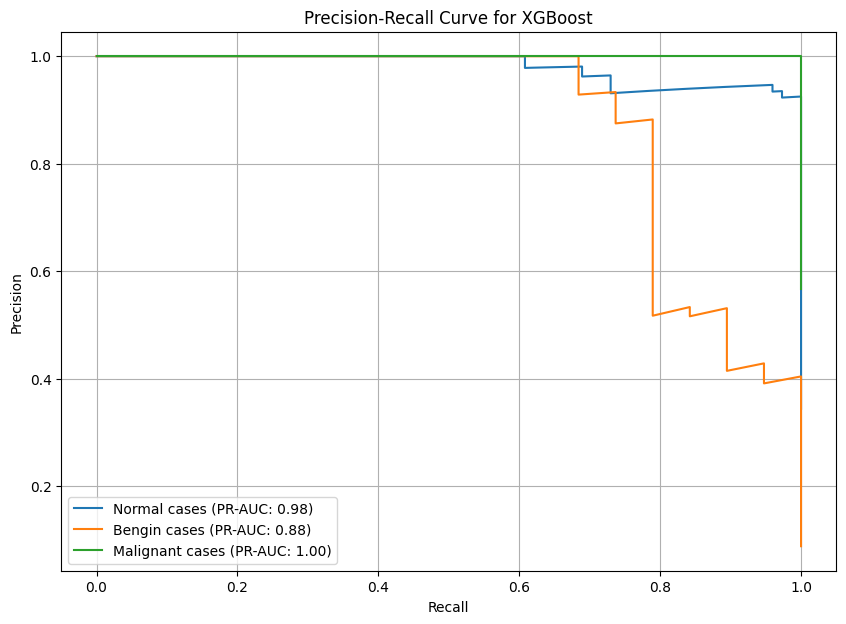

Generating PR-AUC curves for Random Forest...


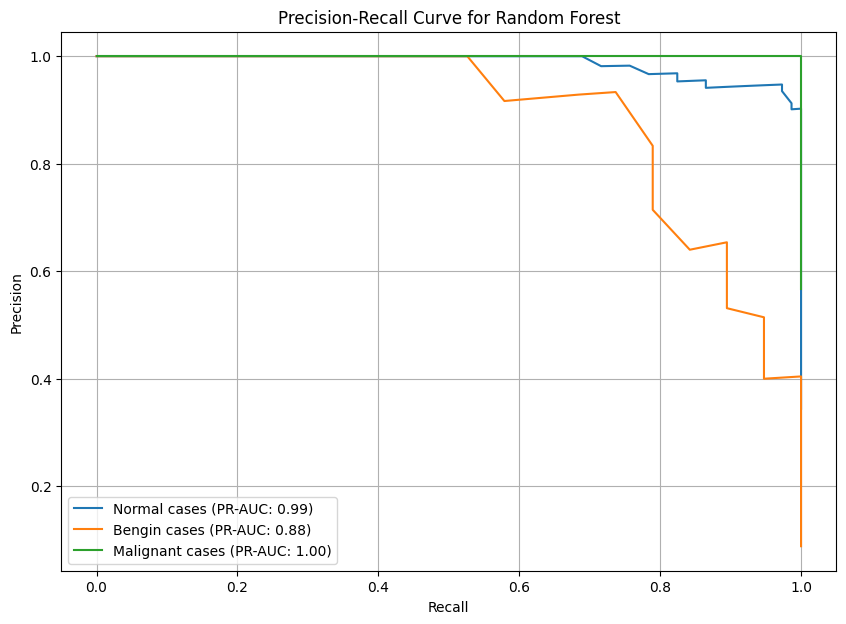

Generating PR-AUC curves for KNN...


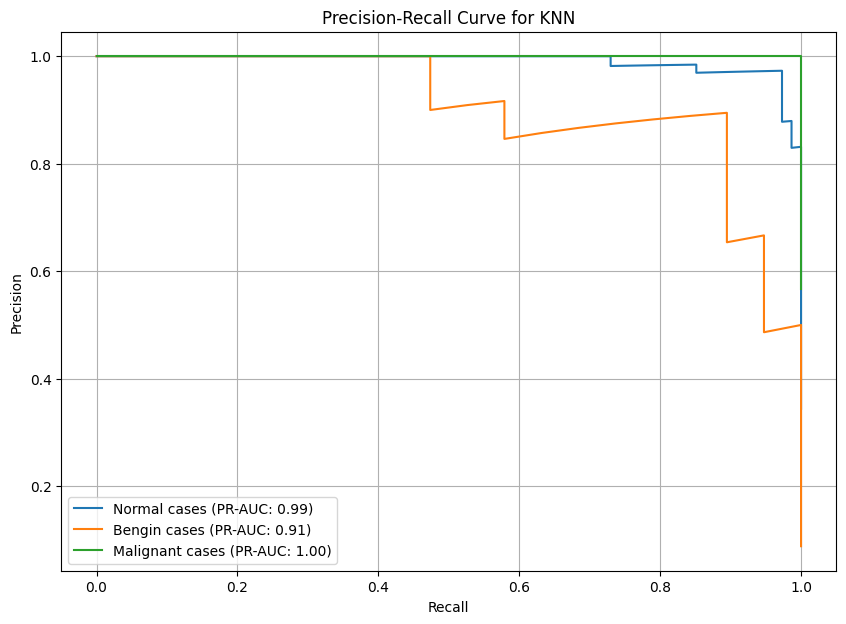

Generating PR-AUC curves for SVM...


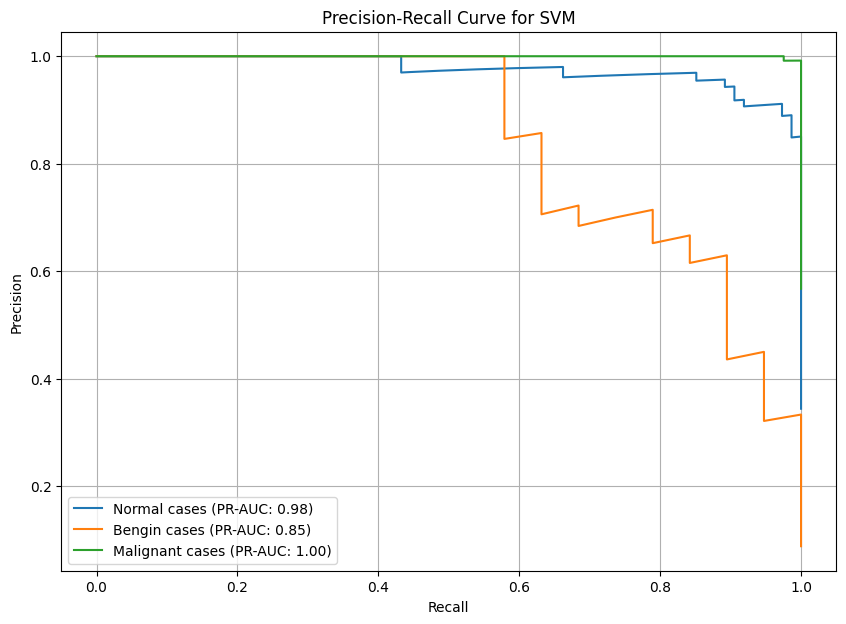

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming the models are defined and trained: models dictionary from the previous step
# Also assuming y_test and y_test_binarized are defined

# Plot PR-AUC for each model
for model_name, model in models.items():
    print(f"Generating PR-AUC curves for {model_name}...")
    
    # Predict probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = model.decision_function(X_test)
    
    plt.figure(figsize=(10, 7))
    
    # Generate Precision-Recall curves for each class
    for i, class_name in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        pr_auc = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"{class_name} (PR-AUC: {pr_auc:.2f})")
    
    # Plot settings
    plt.title(f"Precision-Recall Curve for {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()


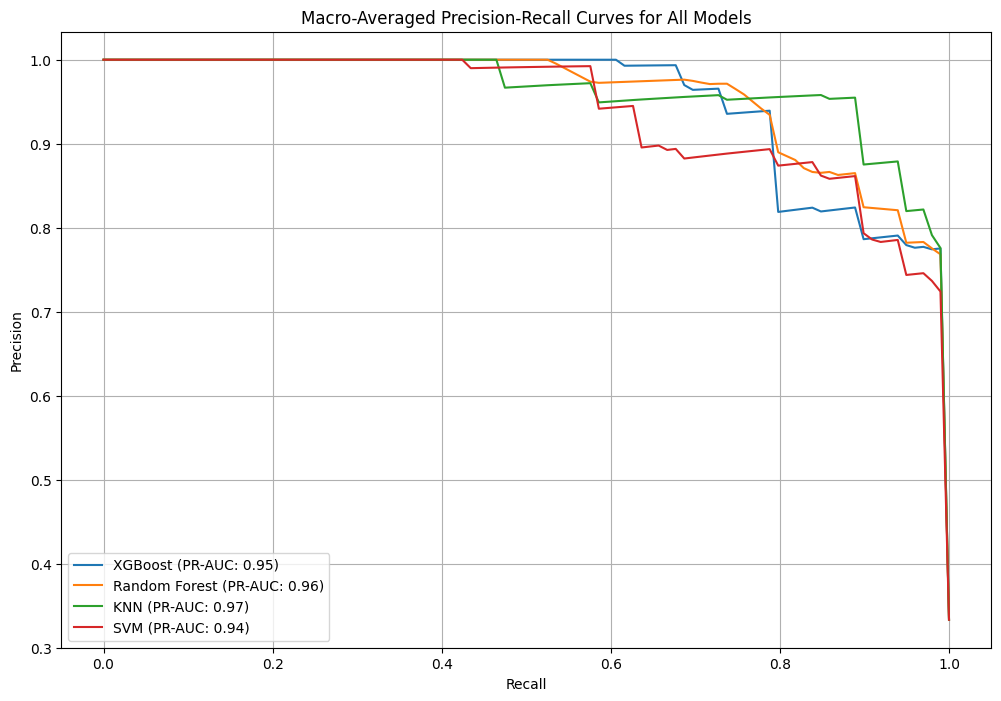

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming the models are defined and trained: models dictionary from the previous step
# Also assuming y_test and y_test_binarized are defined

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot PR-AUC curves for all models
for model_name, model in models.items():
    # Predict probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = model.decision_function(X_test)
    
    # Initialize variables to calculate macro-average PR curve
    precisions = []
    recalls = []
    auc_scores = []
    
    # Compute PR curve and AUC for each class
    for i in range(y_test_binarized.shape[1]):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        pr_auc = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
        
        # Interpolate to standardize recall points (for averaging)
        recalls_interp = np.linspace(0, 1, 100)
        precisions_interp = np.interp(recalls_interp, recall[::-1], precision[::-1])
        
        precisions.append(precisions_interp)
        auc_scores.append(pr_auc)
    
    # Compute the macro-average precision and recall
    macro_precision = np.mean(precisions, axis=0)
    macro_recall = np.linspace(0, 1, 100)
    macro_auc = np.mean(auc_scores)
    
    # Plot the macro-average PR curve
    plt.plot(macro_recall, macro_precision, label=f"{model_name} (PR-AUC: {macro_auc:.2f})")

# Plot settings
plt.title("Macro-Averaged Precision-Recall Curves for All Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid()
plt.show()


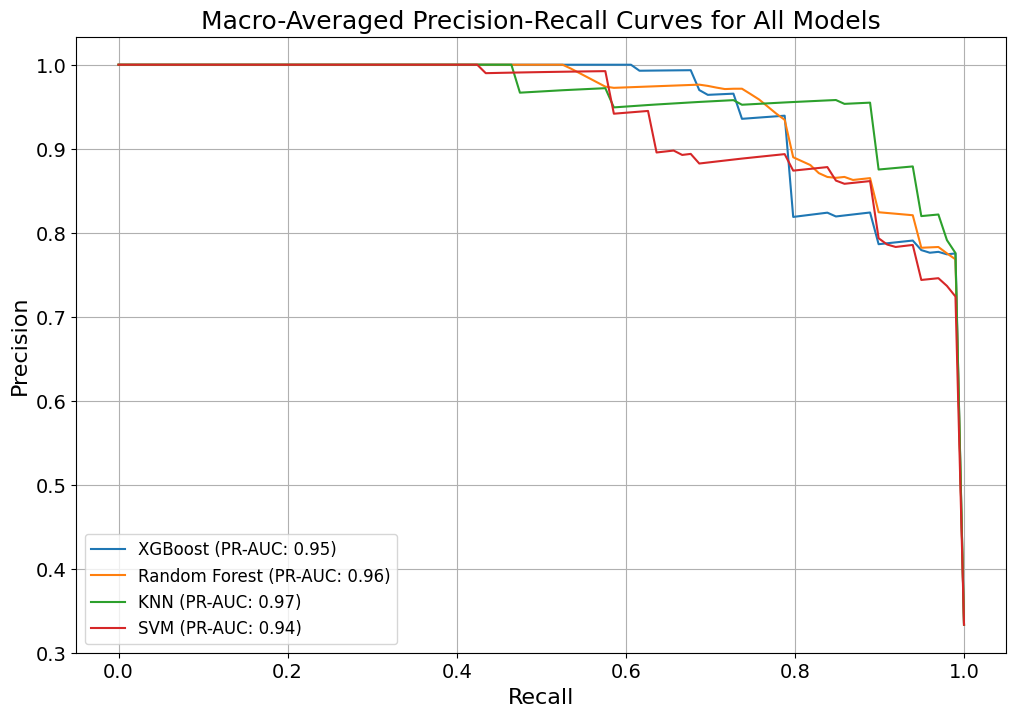

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming the models are defined and trained: models dictionary from the previous step
# Also assuming y_test and y_test_binarized are defined

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot PR-AUC curves for all models
for model_name, model in models.items():
    # Predict probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = model.decision_function(X_test)
    
    # Initialize variables to calculate macro-average PR curve
    precisions = []
    recalls = []
    auc_scores = []
    
    # Compute PR curve and AUC for each class
    for i in range(y_test_binarized.shape[1]):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        pr_auc = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
        
        # Interpolate to standardize recall points (for averaging)
        recalls_interp = np.linspace(0, 1, 100)
        precisions_interp = np.interp(recalls_interp, recall[::-1], precision[::-1])
        
        precisions.append(precisions_interp)
        auc_scores.append(pr_auc)
    
    # Compute the macro-average precision and recall
    macro_precision = np.mean(precisions, axis=0)
    macro_recall = np.linspace(0, 1, 100)
    macro_auc = np.mean(auc_scores)
    
    # Plot the macro-average PR curve
    plt.plot(macro_recall, macro_precision, label=f"{model_name} (PR-AUC: {macro_auc:.2f})")

# Increase font sizes for the plot
plt.title("Macro-Averaged Precision-Recall Curves for All Models", fontsize=18)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower left", fontsize=12)
plt.grid()

# Show the plot
plt.show()


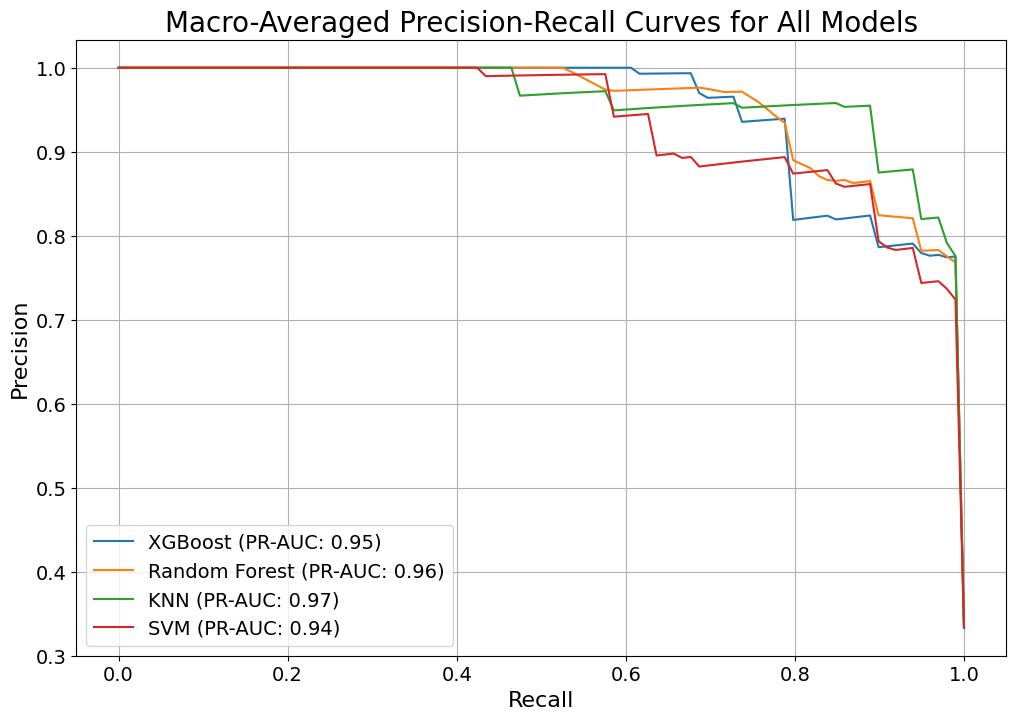

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming the models are defined and trained: models dictionary from the previous step
# Also assuming y_test and y_test_binarized are defined

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot PR-AUC curves for all models
for model_name, model in models.items():
    # Predict probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = model.decision_function(X_test)
    
    # Initialize variables to calculate macro-average PR curve
    precisions = []
    recalls = []
    auc_scores = []
    
    # Compute PR curve and AUC for each class
    for i in range(y_test_binarized.shape[1]):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        pr_auc = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
        
        # Interpolate to standardize recall points (for averaging)
        recalls_interp = np.linspace(0, 1, 100)
        precisions_interp = np.interp(recalls_interp, recall[::-1], precision[::-1])
        
        precisions.append(precisions_interp)
        auc_scores.append(pr_auc)
    
    # Compute the macro-average precision and recall
    macro_precision = np.mean(precisions, axis=0)
    macro_recall = np.linspace(0, 1, 100)
    macro_auc = np.mean(auc_scores)
    
    # Plot the macro-average PR curve
    plt.plot(macro_recall, macro_precision, label=f"{model_name} (PR-AUC: {macro_auc:.2f})")

# Increase font sizes for the plot
plt.title("Macro-Averaged Precision-Recall Curves for All Models", fontsize=20)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower left", fontsize=14)
plt.grid()

# Show the plot
plt.show()


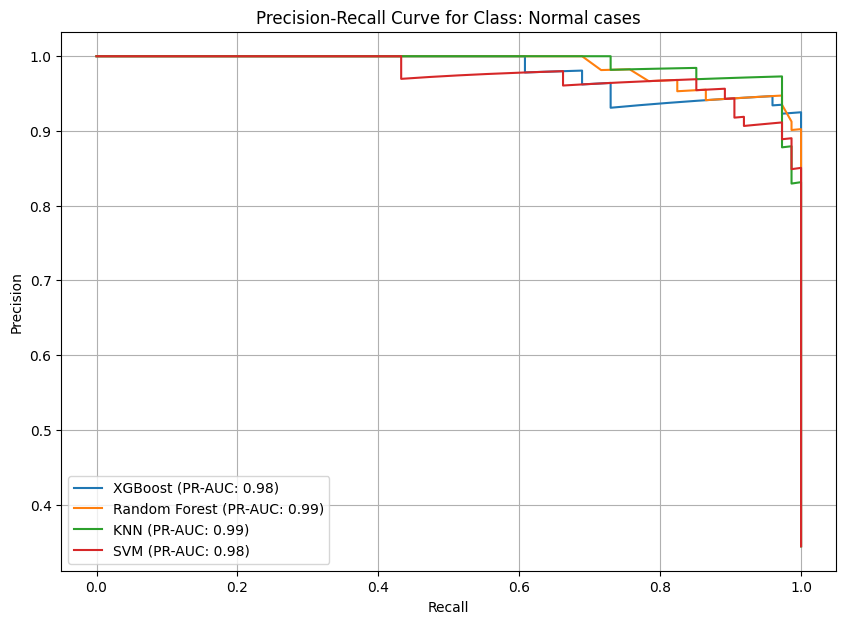

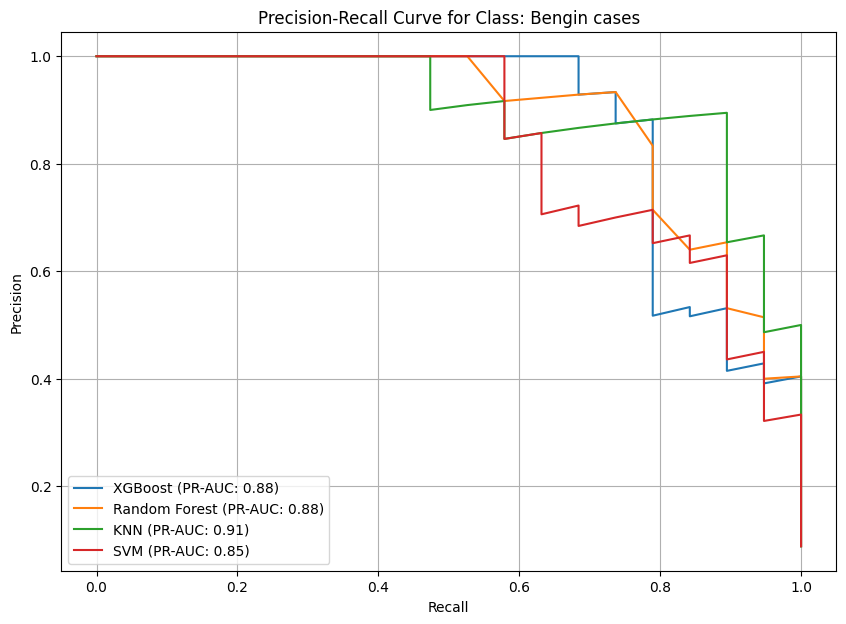

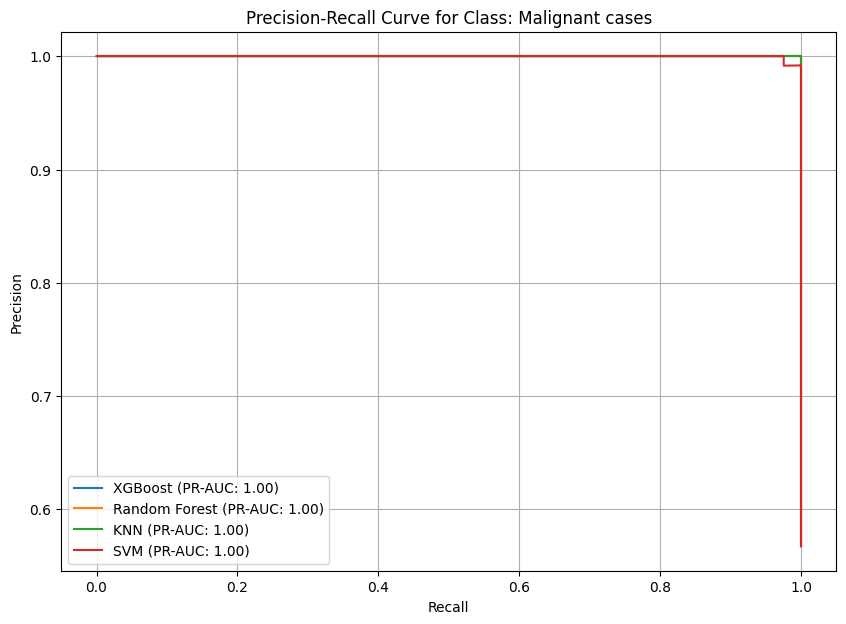

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming the models are defined and trained: models dictionary from the previous step
# Also assuming y_test and y_test_binarized are defined

# Plot PR-AUC curves for all models
for class_idx, class_name in enumerate(classes):
    plt.figure(figsize=(10, 7))
    
    for model_name, model in models.items():
        # Predict probabilities or decision function
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)
        else:
            y_pred_proba = model.decision_function(X_test)
        
        # Generate Precision-Recall curve for the current class
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, class_idx], y_pred_proba[:, class_idx])
        pr_auc = average_precision_score(y_test_binarized[:, class_idx], y_pred_proba[:, class_idx])
        
        # Plot the curve
        plt.plot(recall, precision, label=f"{model_name} (PR-AUC: {pr_auc:.2f})")
    
    # Plot settings
    plt.title(f"Precision-Recall Curve for Class: {class_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()


In [15]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier

# # Define the range of random states to test
# random_states = range(0, 50)  # Adjust this range as needed

# # Define the models with initial parameters
# models = {
#     'Random Forest': RandomForestClassifier(**best_rf_params),
#     'XGBoost': XGBClassifier(**best_xgb_params),  # Assuming best_params are defined
#     'SVM': SVC(**best_svm_params),
#     'KNN': KNeighborsClassifier(**best_knn_params),
# }

# # Dictionary to store the best random state and accuracy for each model
# best_results = {}

# # Iterate through each model
# for model_name, model in models.items():
#     print(f"\nEvaluating {model_name}...")
    
#     best_accuracy = 0
#     best_random_state = None
#     accuracy_dict = {}
    
#     # Iterate through each random state
#     for state in random_states:
#         # Check if the model has a random_state parameter
#         if 'random_state' in model.get_params():
#             model.set_params(random_state=state)

#         # Train the model
#         model.fit(X_train, y_train)
        
#         # Predict on the test set
#         y_pred = model.predict(X_test)
        
#         # Calculate accuracy
#         accuracy = accuracy_score(y_test, y_pred)
#         accuracy_dict[state] = accuracy
        
#         # Update best accuracy and random state if needed
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_random_state = state
        
#         # Print accuracy for the current random state
#         print(f"Random State {state}: Accuracy = {accuracy:.2%}")

#     # Store the best random state and accuracy for the current model
#     best_results[model_name] = {
#         'Best Random State': best_random_state,
#         'Best Accuracy': best_accuracy,
#         'All Accuracies': accuracy_dict
#     }

#     # Print the best random state and accuracy for the current model
#     print(f"\nBest Random State for {model_name}: {best_random_state}")
#     print(f"Best Accuracy for {model_name}: {best_accuracy:.2%}")

# # Print summary of best results for all models
# print("\nSummary of Best Results:")
# for model_name, results in best_results.items():
#     print(f"{model_name}: Best Random State = {results['Best Random State']}, Best Accuracy = {results['Best Accuracy']:.2%}")


In [16]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier

# # Define the range of random states to test
# random_states = range(0, 50)  # Adjust this range as needed

# # Define the models with initial parameters
# models = {
#     'Random Forest': RandomForestClassifier(n_jobs=-1),
#     # 'XGBoost': XGBClassifier(**best_xgb_params),  # Assuming best_params are defined
#     # 'SVM': SVC(**best_svm_params),
#     # 'KNN': KNeighborsClassifier(**best_knn_params),
# }

# # Dictionary to store the best random state and accuracy for each model
# best_results = {}

# # Iterate through each model
# for model_name, model in models.items():
#     print(f"\nEvaluating {model_name}...")
    
#     best_accuracy = 0
#     best_random_state = None
#     accuracy_dict = {}
    
#     # Iterate through each random state
#     for state in random_states:
#         # Check if the model has a random_state parameter
#         if 'random_state' in model.get_params():
#             model.set_params(random_state=state)

#         # Train the model
#         model.fit(X_train, y_train)
        
#         # Predict on the test set
#         y_pred = model.predict(X_test)
        
#         # Calculate accuracy
#         accuracy = accuracy_score(y_test, y_pred)
#         accuracy_dict[state] = accuracy
        
#         # Update best accuracy and random state if needed
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_random_state = state
        
#         # Print accuracy for the current random state
#         print(f"Random State {state}: Accuracy = {accuracy:.2%}")

#     # Store the best random state and accuracy for the current model
#     best_results[model_name] = {
#         'Best Random State': best_random_state,
#         'Best Accuracy': best_accuracy,
#         'All Accuracies': accuracy_dict
#     }

#     # Print the best random state and accuracy for the current model
#     print(f"\nBest Random State for {model_name}: {best_random_state}")
#     print(f"Best Accuracy for {model_name}: {best_accuracy:.2%}")

# # Print summary of best results for all models
# print("\nSummary of Best Results:")
# for model_name, results in best_results.items():
#     print(f"{model_name}: Best Random State = {results['Best Random State']}, Best Accuracy = {results['Best Accuracy']:.2%}")


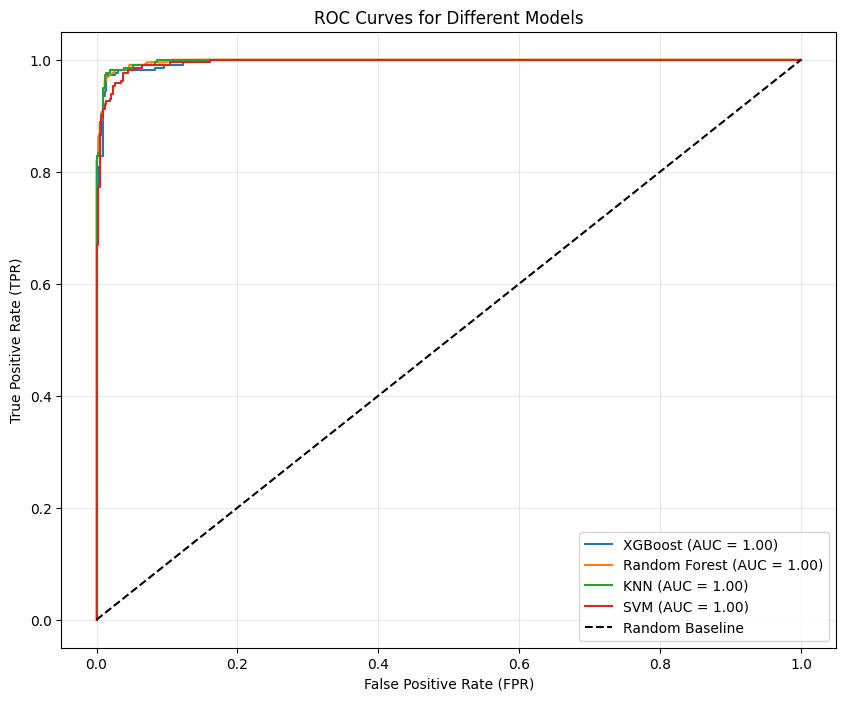

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Split the data into train and test sets

# Binarize labels for ROC computation (needed for multiclass)
y_binarized = label_binarize(y_test, classes=list(range(len(set(y)))))

# Initialize models with the best parameters
xgb_model = XGBClassifier(**best_xgb_params)
rf_model = RandomForestClassifier(**best_rf_params)
knn_model = KNeighborsClassifier(**best_knn_params)
svm_model = SVC(**best_svm_params, probability=True)

# Fit models
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predict probabilities
xgb_probs = xgb_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)

# Compute ROC curves and AUCs
plt.figure(figsize=(10, 8))

models = [
    ("XGBoost", xgb_probs),
    ("Random Forest", rf_probs),
    ("KNN", knn_probs),
    ("SVM", svm_probs)
]

for model_name, probs in models:
    fpr, tpr, _ = roc_curve(y_binarized.ravel(), probs.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline')

# Add labels and legend
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


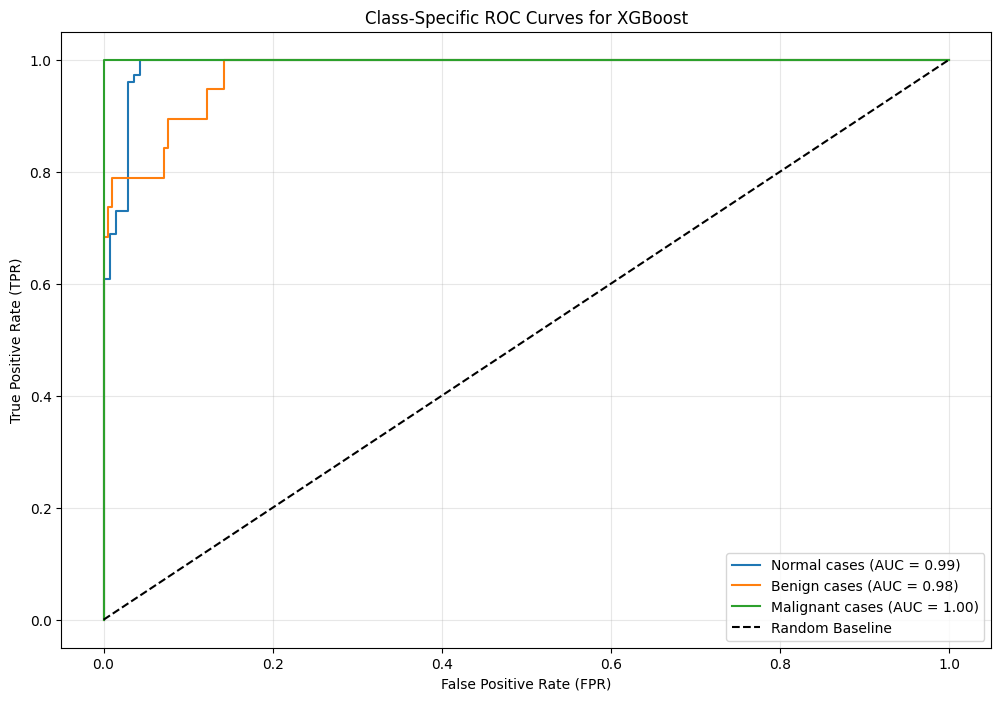

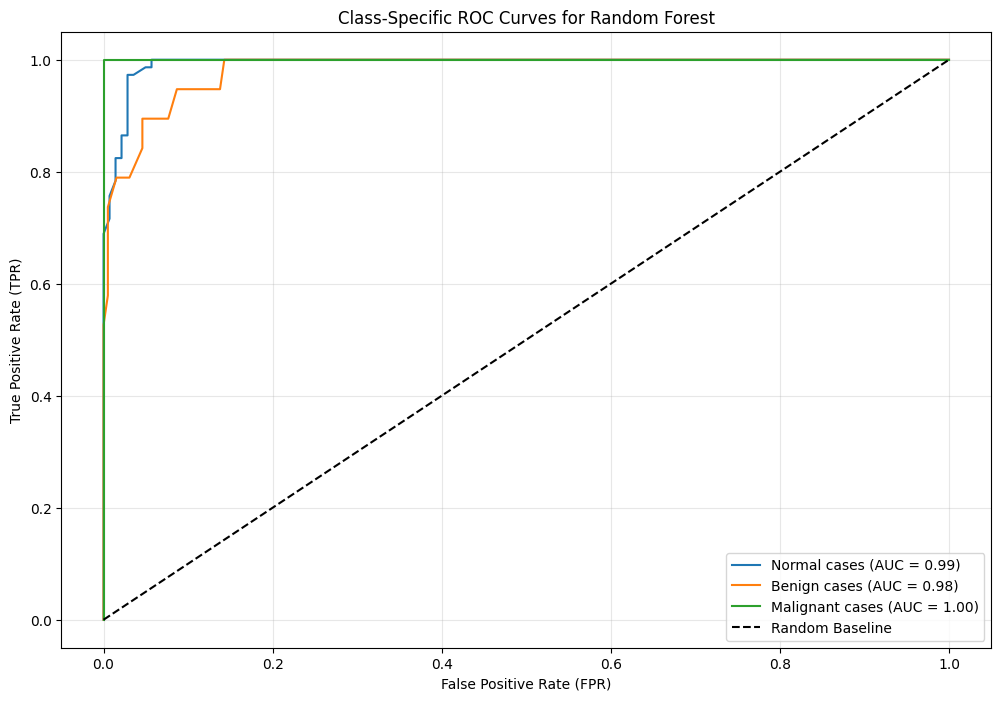

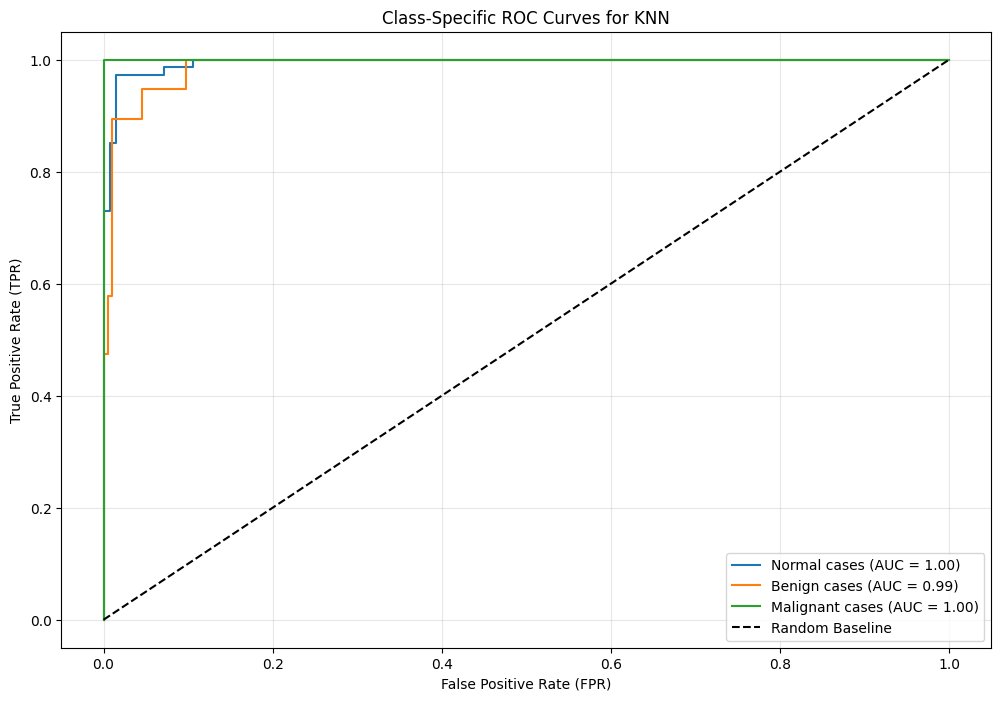

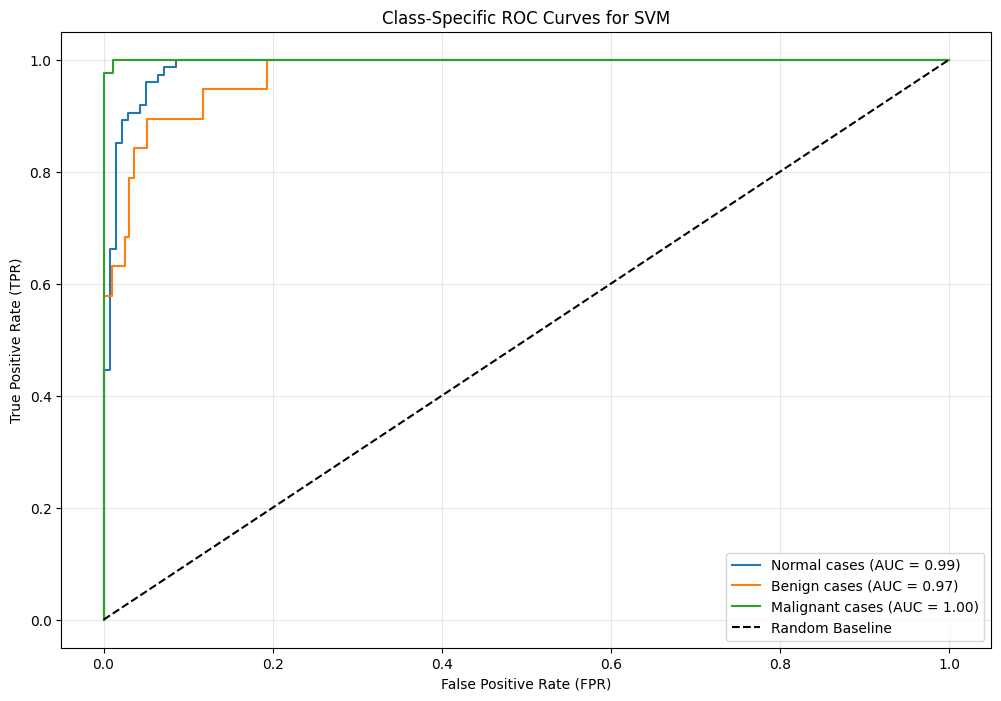

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Class names
classes = ['Normal cases', 'Benign cases', 'Malignant cases']
n_classes = len(classes)

# Binarize the labels
y_binarized = label_binarize(y_test, classes=list(range(n_classes)))

# Initialize models with best parameters
xgb_model = XGBClassifier(**best_xgb_params)
rf_model = RandomForestClassifier(**best_rf_params)
knn_model = KNeighborsClassifier(**best_knn_params)
svm_model = SVC(**best_svm_params, probability=True)

# Fit models
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predict probabilities
xgb_probs = xgb_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)

# List of models and their predictions
models = [
    ("XGBoost", xgb_probs),
    ("Random Forest", rf_probs),
    ("KNN", knn_probs),
    ("SVM", svm_probs)
]

# Generate class-specific ROC plots for each model
for model_name, probs in models:
    plt.figure(figsize=(12, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_binarized[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve for each class
        plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")
    
    # Add labels, legend, and random baseline
    plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline')
    plt.title(f"Class-Specific ROC Curves for {model_name}")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()
